# Основы машинного обучения: лабораторная работа №1
## Задание 3. Знакомство с Pandas

В этом задании необходимо научиться базовым приемам работы с данными. Необходимо загрузить заданный по варианту датасет, провести разведочный анализ данных, сформулировать гипотезы о возможном значении всех полей в датасете, проверить эти гипотезы, и ответить на вопросы по данным. <!-- Если в конкретном задании не указано иное, проводить очистку данных (удаление пустых и невалидных значений) не нужно. -->

### Цель

Знакомство с разведочным анализом данных и применение Pandas для извлечения информации

### Оценивание и баллы

За это задание в общей сложности можно получить до 7 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Важные замечания

1. *Откройте этот файл в своем репозитории на GitHub и скопируйте адрес из адресной строки браузера. Перейдтие в [Google Colab](https://colab.research.google.com/), выберите `Файл -> Открыть ноутбук -> GitHub`, вставьте скопированный URL и нажмите кнопку поиска (кнопка с лупой справа от поля ввода строки для поиска). В Google Colab откроется копия этого ноутбука из персонального репозитория на GitHub.*
2. *Не удаляйте и не изменяйте имена переменных в ячейках с кодом ниже. Можно добавлять в каждую ячейку произвольное количество строк кода, главное - сохранить результат решения задачи в предопределенную (-ые) переменную (-ые) в соответствующей ячейке. Если этого не сделать, автоматические тесты не будут пройдены.*
3. *Чтобы сохранить работу, выбрите `Файл -> Сохранить копию на GitHub` и __вручную выберите правильный репозиторий из раскрывающегося списка__.*
4. *Если в процессе выполнения задания этот файл окажется испорчен, ознакомьтесь с инструкцией в ноутбуке [jupyter_assignment](jupyter_assignment.ipynb), раздел "Повторная сдача".*  


#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [3]:
### BEGIN YOUR CODE

Student_ID = 15

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [4]:
datasets = [('Chipotle','https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'), ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'), ('Open Food Facts', 'https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2')]

dataset_id = None if Student_ID is None else Student_ID % 3
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")
    print(f"В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № {dataset_id+1}")

Датасет 'Chipotle' доступен по следующей ссылке: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № 1


Скачайте датасет с помощью команды `!wget <dataset_url>`, где `<dataset_url>` необходимо заменить на ссылку на датасет, появившуюся после выполнения предыдущей ячейки. При необходимости разархивируйте датасет, используя команды `!unzip`, `!tar` и др.

*Примечание: в Jupyter-ноутбуке можно использовать любые команды командного интерпретатора bash. Для этого необходимо поставить в ячейке с кодом восклицательный знак `!`, после которого записать команду bash со всеми необходимыми аргументами. Результат выполнения этой команды bash будет возвращен в Jupyter и его можно использовать в коде на Python.*

In [5]:
### BEGIN YOUR CODE

!wget https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

# !unzip ...
# !tar ...
# !gunzip ...

### END YOUR CODE

--2024-11-11 22:26:59--  https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364975 (356K) [text/plain]
Saving to: ‘chipotle.tsv’

chipotle.tsv        100%[===================>] 356.42K  --.-KB/s    in 0.04s   

2024-11-11 22:26:59 (8.02 MB/s) - ‘chipotle.tsv’ saved [364975/364975]



##### 2. Загрузите датасет в pandas.DataFrame, сохраните его в переменной `df`. Cконвертируйте названия столбцов в нижний регистр

In [24]:
import pandas as pd
import re
df = pd.read_csv('chipotle.tsv', sep='\t')
df.columns = df.columns.str.lower()

# Place your code to read the dataset here. Don't forget to import all the libraries you need!

##### 3. Какие столбцы присутствуют в наборе данных? (0.25 балла)

In [7]:
columns = df.columns.tolist()

print(columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


##### 4. Ответьте на вопрос и сохраните ответ в переменной `answer1` (0.25 балла)

Вопросы:
1. Какое блюдо (`item_name`) заказывали чаще всего?
2. Сколько авиаперевозчиков (`carrier`) представлены в датасете?
3. По скольки продуктам в датасете имеется информация о содержании аллергенов (`allergens`)?

In [8]:
answer1 = df['item_name'].mode()[0]

print(answer1)

Chicken Bowl


##### 5. Ответьте на вопрос и сохраните ответ в переменной `answer2` (0.5 балла)

Вопросы:
1. Сколько всего было заказов блюда, название которого сохранено в `answer1`?
2. Посчитайте общие суммарные количества перевезенных пассажиров (`passangers`), фунтов груза (`freight`) и почты (`mail`) на маршруте из Великобритании (UK) в США (US). В `answer2` запишите максимальное из трех получившихся чисел.
3. Сколько всего продуктов, относящихся к категории "молочные" (`Dairies,Milks`), с заполненным названием?

In [9]:
answer2 = df[df['item_name'] == answer1]['quantity'].sum()

print(answer2)

761


##### 6. Ответьте на вопрос и сохраните ответ в переменной `answer3` (0.5 балла)

Вопросы:
1. Какой доход получила сеть Chipotle Mexican Grill на заказах, попавших в датасет?
2. Какой авиаперевозчик (`unique_carrier_name`) перевез больше всего груза (`mail` + `freight`)?
3. Как называется продукт категории `Fats` с максимальной жирностью, не превышающей 30 г на 100 г продукта?

In [10]:
df['item_price'] = df['item_price'].replace('[\$,]', '', regex=True).astype(float)
answer3 = (df['quantity'] * df['item_price']).sum()

print(answer3)

39237.02


##### 7. Ответьте на вопрос и сохраните ответ в переменной `answer4` (0.5 балла)

Вопросы:
1. Каков средний доход с одного заказа?
2. Какое максимальное количество пассажиров одна авиакомпания смогла перевезти из США в другие страны за все время?
3. Какова энергетическая ценность в кДж продукта из России (`category_en`) имеющего максимальное содержание холистерина?

In [11]:
num_orders = df['order_id'].nunique()
answer4 = answer3  / num_orders

print(answer4)

21.39423118865867


##### 8. Ответьте на вопрос и сохраните ответ в переменной `answer5` (1 балл)

Вопросы:
1. Сколько раз был заказан самый популярный напиток (Coke, Sprite, Mountain Dew и т.п.)?
2. Между какими двумя городами было перевезено наибольшее количество пассажиров? Учтите оба направления. Ответ запишите в виде списка из двух строк.
3. Привести названия всех аллергенов к нижнему регистру. Какой аллерген встречается в продуктах чаще всего?

In [12]:
drinks = df[df['item_name'].str.contains('Drink|Soda|Nectar|Izze|Water', case=False, na=False)]
drinks['drink_name'] = drinks['choice_description'].apply(lambda x: x[1:-1] if pd.notnull(x) else 'Bottled Water')

# Найдем самый популярный напиток
most_popular_drink = drinks.groupby('drink_name')['quantity'].sum().idxmax()
answer5 = drinks[drinks['drink_name'] == most_popular_drink]['quantity'].sum()

print(answer5)
print(f"Самый популярный напиток: {most_popular_drink}")

211
Самый популярный напиток: Bottled Water


<ipython-input-12-589c30441e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drinks['drink_name'] = drinks['choice_description'].apply(lambda x: x[1:-1] if pd.notnull(x) else 'Bottled Water')


##### 9. Ответьте на вопрос и сохраните ответ в переменной `answer6` (1 балл)

Вопросы:
1. Какой суммарный доход принесли напитки в заказах вегетарианцев?
2. Для пары городов из предыдущего вопроса найдите 3 авиакомпании, которые перевезли больше всего пассажиров. Посчитайте, какой процент от общего пассажиропотока между этими городами перевезла каждая из трех авиакомпаний. В `answer6` запишите найденные проценты в виде списка из трех чисел, округлив их до двух знаков после запятой.
3. Найти самый опасный продукт, содержащий наибольшее количество аллергенов.

In [16]:
# Определяем список слов, которые указывают на невегетарианские блюда
non_vegetarian_keywords = ['Chicken', 'Steak', 'Barbacoa', 'Carnitas']

# Находим заказы, которые содержат невегетарианские блюда
non_vegetarian_orders = df[df['item_name'].str.contains('|'.join(non_vegetarian_keywords), case=False, na=False)]['order_id'].unique()

# Находим заказы, которые содержат блюда с подписью "Veggie" (вегетарианские)
veggie_orders = df[df['item_name'].str.contains('Veggie', case=False, na=False)]['order_id'].unique()

# Находим список истинно вегетарианских заказов
vegetarian_order_ids = set(veggie_orders) - set(non_vegetarian_orders)

# Фильтруем df, чтобы оставить только вегетарианские заказы
vegetarian_orders = df[df['order_id'].isin(vegetarian_order_ids)]

# Фильтруем вегетарианские заказы, чтобы оставить только напитки
vegetarian_drinks = vegetarian_orders[vegetarian_orders['item_name'].str.contains('Drink|Soda|Nectar|Izze|Water', case=False, na=False)]

# Преобразуем столбец 'item_price' в строковый формат, если это необходимо
vegetarian_drinks['item_price'] = vegetarian_drinks['item_price'].astype(str)

# Удаляем символ доллара и преобразуем цену в числовой формат
vegetarian_drinks.loc[:, 'item_price'] = vegetarian_drinks['item_price'].str.replace('$', '').astype(float)

# Находим суммарный доход от напитков в заказах вегетарианцев
total_revenue_from_veg_drinks = (vegetarian_drinks['quantity'] * vegetarian_drinks['item_price']).sum()

answer6 = total_revenue_from_veg_drinks

print(answer6)

47.67


<ipython-input-16-a180522a42ca>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegetarian_drinks['item_price'] = vegetarian_drinks['item_price'].astype(str)


##### 10. Ответьте на вопрос и сохраните ответ в переменной `answer7` (1 балл)

Вопросы:
1. Сколько было сделано вегетарианских заказов? Заказ не считается вегетарианским, если в нем были не вегетарианские блюда.
2. Для каждой страны найдите процент международного пассажиропотока (относительно США), используя общее количество пассажиров на рейсах класса F. В `answer7` запишите название страны с третьим по величине пассажиропотоком в/из США.
3. Переведите названия групп продуктов (`pnns_groups_1`, `pnns_groups_2`) в нижний регистр. В переменную `answer7` запишите список, содержащий три элемента: название группы продуктов 1, название группы продуктов 2 и среднее количество пищевых волокон (`fiber`) для седьмой по насыщенности пищевыми волокнами группы продуктов.

In [17]:
# Определяем список слов, которые указывают на невегетарианские блюда
non_vegetarian_keywords = ['Chicken', 'Steak', 'Barbacoa', 'Carnitas']

# Находим заказы, которые содержат невегетарианские блюда
non_vegetarian_orders = df[df['item_name'].str.contains('|'.join(non_vegetarian_keywords), case=False, na=False)]['order_id'].unique()

# Находим заказы, которые содержат блюда с подписью "Veggie" (вегетарианские)
veggie_orders = df[df['item_name'].str.contains('Veggie', case=False, na=False)]['order_id'].unique()

# Находим список истинно вегетарианских заказов
vegetarian_order_ids = set(veggie_orders) - set(non_vegetarian_orders)

# Подсчитываем количество вегетарианских заказов
num_vegetarian_orders = len(vegetarian_order_ids)

answer7 = num_vegetarian_orders

print(answer7)

82


##### 11. Ответьте на вопрос и сохраните ответ в переменной `answer8` (1 балл)

Вопросы:
1. Какой соус или дополнительный ингредиент по выбору (`choice_description`) чаще всего берут вместе с бурито с курицей (Chicken Burrito)?
2. В каком месяце пассажиропоток между городами, записанными в переменную `answer5`, был максимальным?
3. Какое название у группы продуктов `pnns_groups_2`, явояющейся наиболее сбалансированной с точки зрения среднего содержания калорий, жиров и углеводов? Под "сбалансированной" понимать близость БЖУ к пропорции 1:1:4.

In [26]:
# Отфильтруем строки, содержащие "Chicken Burrito"
chicken_burrito_orders = df[df['item_name'].str.contains('Chicken Burrito', case=False, na=False)]

# Разбиваем строки в столбце 'choice_description' на отдельные ингредиенты
all_ingredients = []
for description in chicken_burrito_orders['choice_description']:
    if pd.notnull(description):
        # Удаляем квадратные скобки и разделяем строку по запятым
        ingredients = description.strip('[]').split(', ')
        all_ingredients.extend(ingredients)

# Подсчитываем частоту каждого ингредиента
ingredient_counts = Counter(all_ingredients)

# Находим самый популярный ингредиент
answer8 = ingredient_counts.most_common(1)[0][0]
print(answer8)

Cheese


##### 12. Визуализируйте данные в соответствии с заданием (1 балл)

1. Построить гистограмму распределения общей стоимости заказов. Найти и отметить на графике средний чек и медианную стоимость заказа.
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
3. Построить столбчатую гистограмму усредненной по группам продуктов энергетической ценности, с группировкой по `pnns_groups_1`.


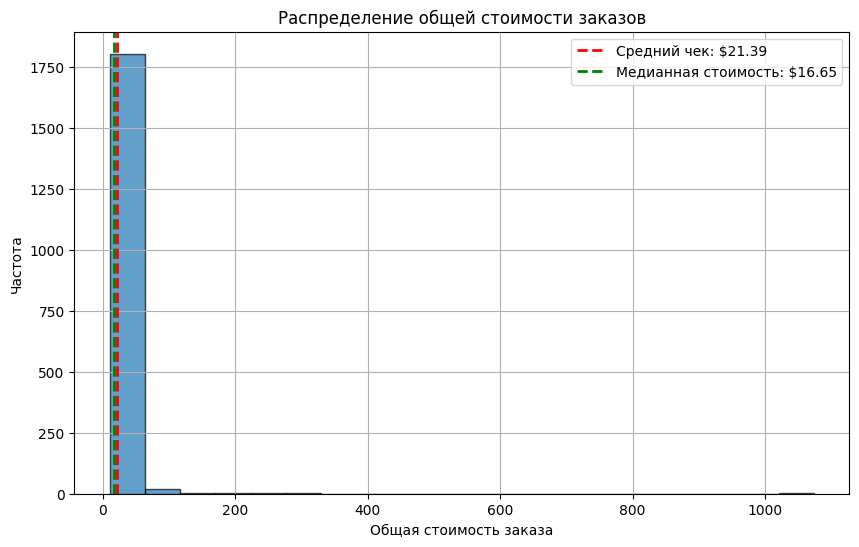

In [34]:
import matplotlib.pyplot as plt

# Преобразовываем столбец 'item_price' в числовой формат, удалив символ доллара и заменив запятые на точки
df['item_price'] = df['item_price'].replace('[\$,]', '', regex=True).astype(float)

# Вычисляем общую стоимость каждого заказа
df['total_price'] = df['quantity'] * df['item_price']

# Группируем данные по order_id и суммируем общую стоимость заказов
order_totals = df.groupby('order_id')['total_price'].sum()

# Вычисление среднего чека и медианную стоимость заказа
mean_order_total = order_totals.mean()
median_order_total = order_totals.median()

# Построение гистограммы распределения общей стоимости заказов
plt.figure(figsize=(10, 6))
plt.hist(order_totals, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean_order_total, color='r', linestyle='dashed', linewidth=2, label=f'Средний чек: ${mean_order_total:.2f}')
plt.axvline(median_order_total, color='g', linestyle='dashed', linewidth=2, label=f'Медианная стоимость: ${median_order_total:.2f}')
plt.xlabel('Общая стоимость заказа')
plt.ylabel('Частота')
plt.title('Распределение общей стоимости заказов')
plt.legend()
plt.grid(True)
plt.show()